# Proof-of-Principle notebook

**Author : Inga Ulusoy**  
*Date : June 2025*  
*Affiliation : Scientific Software Center*  

In [2]:
# required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Union

In [3]:
# constants and global functions
filepathname = "../data"
filepath = Path(filepathname)
if not filepath.exists():
    raise FileNotFoundError(f"Directory {filepathname} does not exist.")
filenames = [f for f in filepath.glob("**.*") if f.is_file()]

In [4]:
filenames

[PosixPath('../data/efield.t'),
 PosixPath('../data/table.dat'),
 PosixPath('../data/npop.t'),
 PosixPath('../data/expec.t'),
 PosixPath('../data/nstate_i.t')]

In [5]:
# reading of the data files
def read_file(filename: Path, method: str, skiprows: int = 1) -> Union[pd.DataFrame, np.ndarray]:
    """Read the file and return content.
    
    Args:
        filename (Path): Path to the file.
        method (str): Method to read the file, either "pandas" or "numpy".
        skiprows (int): Number of rows to skip at the beginning of the 
            file for numpy reading (default is 1).
    Returns:
        pd.DataFrame | np.ndarray: Data read from the file."""
    if method == "pandas":
        return pd.read_csv(filename, sep=r"\s+")
    elif method == "numpy":
        return np.loadtxt(filename, delimiter="\t", skiprows=skiprows)
    else:
        raise ValueError("Method must be either 'pandas' or 'numpy'.")

# Statistical analysis

Find correlations in the data sets. Analyse the data statistically and plot your results.  

Here we would want to do everything with pandas and leave the data in a dataframe. The files that are relevant to you are `expect.t`, `npop.t` and `table.dat`.

### Task 1: Read in expec.t and plot relevant data

<Axes: title={'center': 'Energy over Time'}, xlabel='time'>

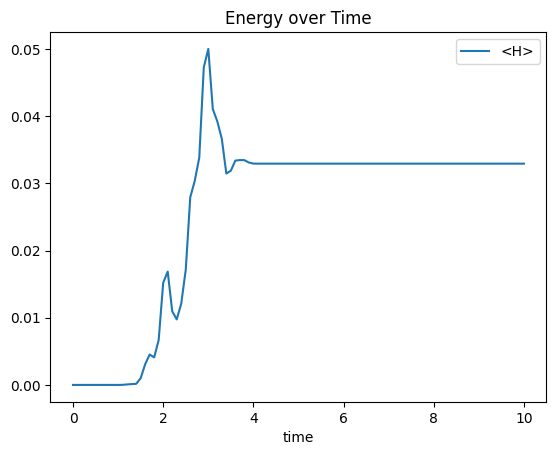

In [6]:
# read and plot expec.t
expect_df = read_file(filenames[3], "pandas")
# specify column names
expect_df.plot(x="time", y="<H>", kind="line", title="Energy over Time")

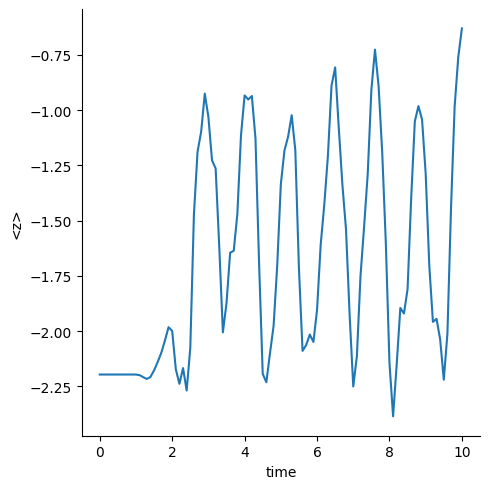

In [7]:
sns.relplot(data=expect_df, kind="line", x="time", y="<z>")
plt.show()

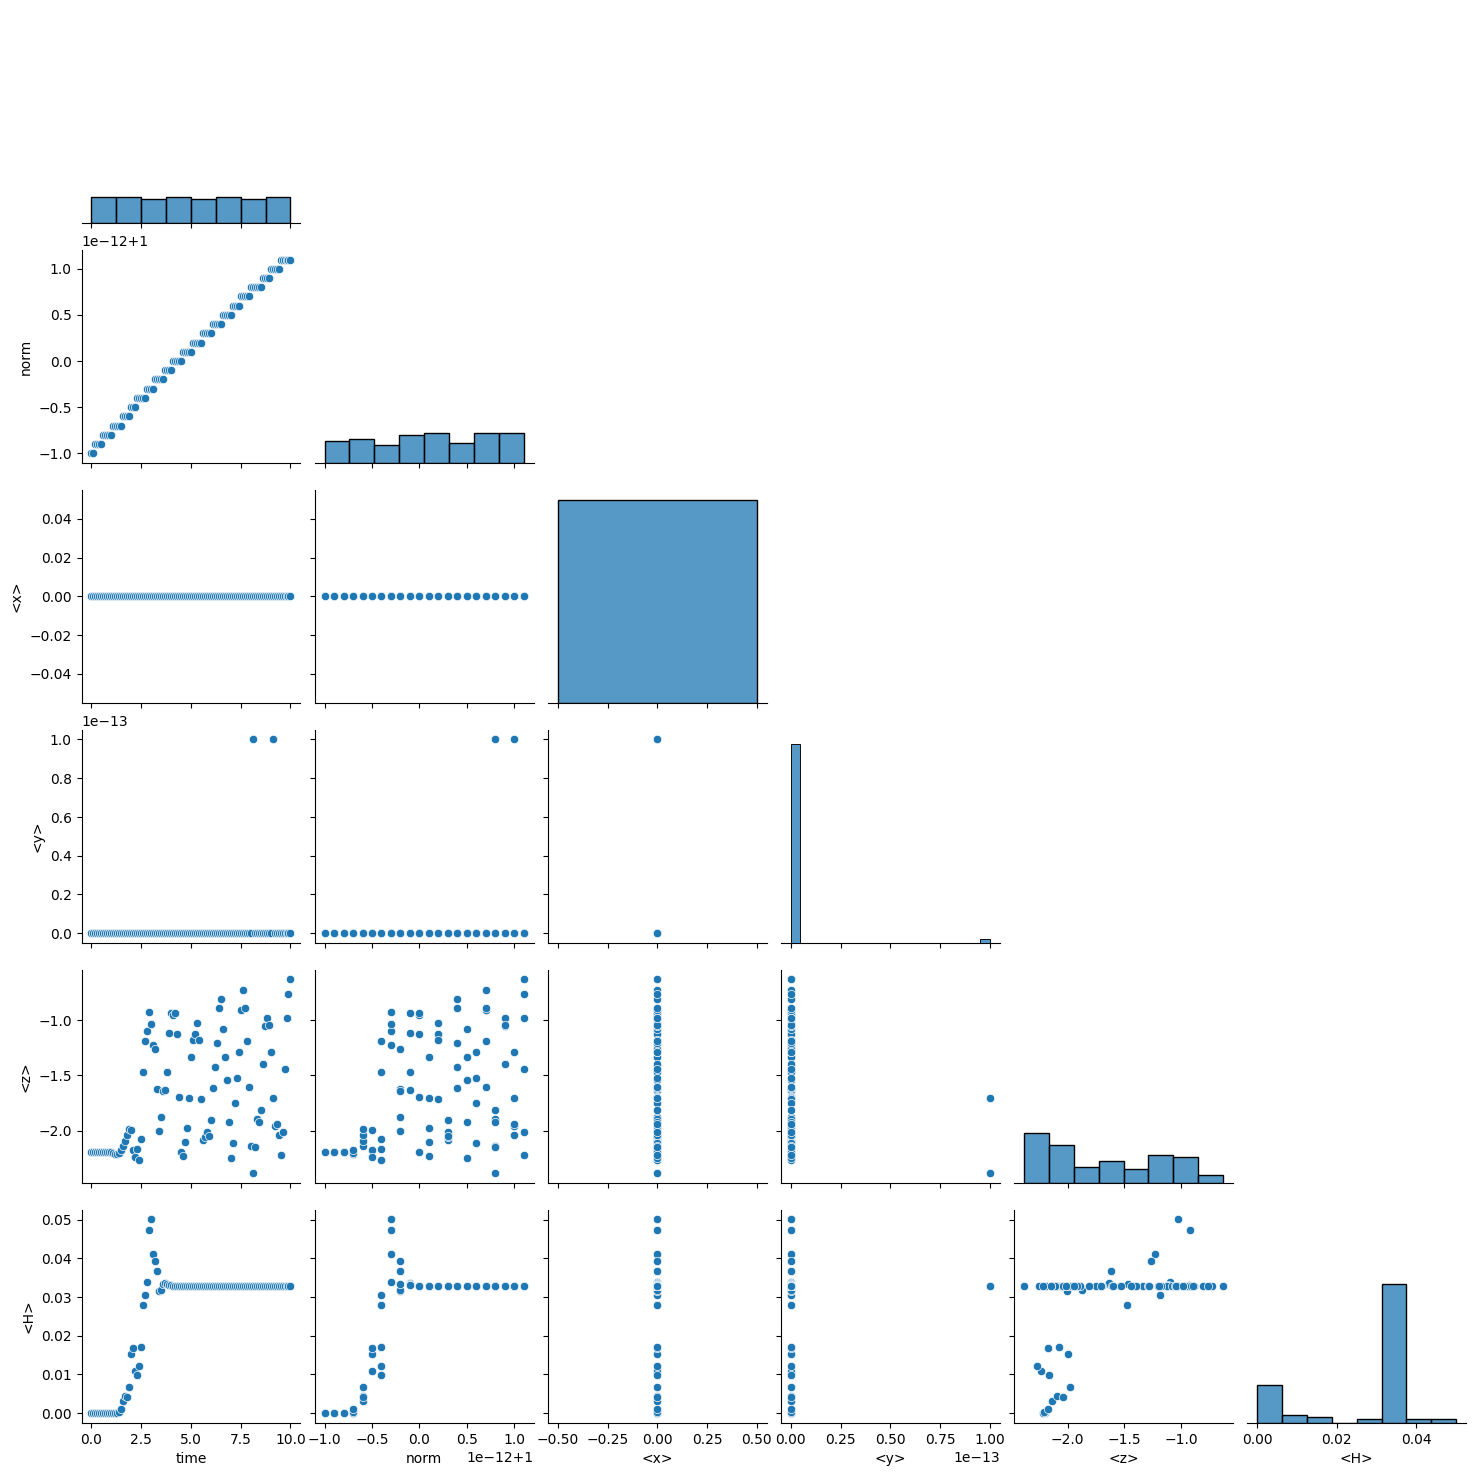

In [9]:
sns.pairplot(expect_df, corner=True)
plt.show()

We can discard the entries norm, \<x>, and \<y> as these are mostly constant.

In [10]:
# eliminate columns based on the variance: if the variance of the values
# in a column is below a given threshold, that column is discarded
expect_df.var()

time    8.585000e+00
norm    3.908161e-25
<x>     0.000000e+00
<y>     1.960396e-28
<z>     2.461813e-01
<H>     1.840395e-04
dtype: float64

In [11]:
thresh = 1.0e-3


In [12]:
# df_expec.drop(df_expec.var()[df_expec.var()<threshv].index.values, axis=1)
# print(df_expec.var()<threshv) # this will return columns with variance below the threshold
# df_expec.var()[df_expec.var()<threshv].index # this will return the index of those columns
# df_expec.var()[df_expec.var()<threshv].index.values # this will return the index of those columns in an array
# df_expec.drop(df_expec.var()[df_expec.var()<threshv].index.values) # we want to drop those columns
expect_df.drop(
    expect_df.var()[expect_df.var() < thresh].index.values, axis=1
)  # but we have to pick the right axis (columns, not rows)

,time,<z>
0,0.0,-2.196320
1,0.1,-2.196320
2,0.2,-2.196320
3,0.3,-2.196320
4,0.4,-2.196320
...,...,...
96,9.6,-2.012171
97,9.7,-1.441347
98,9.8,-0.982419
99,9.9,-0.759304


### Task 2: Create plots of the relevant data and save as .pdf.

In [ ]:
# create plots

### Task 3: Read in file `npop.t` and analyze correlations in the data

In [ ]:
# read in npop.t

In [ ]:
# discard all columns with variance below a set threshold - we can consider them as constant

Plot the remaining columns. Seaborn prefers "long format" (one column for all measurement values, one column to indicate the type) as input, whereas the cvs is in "wide format" (one column per measurement type).

In [ ]:
# plot ideally with seaborn

## Quantify the pairwise correlation in the data

- negative correlation: y values decrease for increasing x - large values of one feature correspond to small values of the other feature
- weak or no correlation: no trend observable, association between two features is hardly observable
- positive correlation: y values increase for decreasing x - small values of one feature correspond to small values of the other feature

Remember that correlation does not indicate causation - the reason that two features are associated can lie in their dependence on same factors.

Correlate the value pairs using Pearson's $r$. Pearson's $r$ is a measure of the linear relationship between features:

$r = \frac{\sum_i(x_i − \bar{x})(y_i − \bar{y})}{\sqrt{\sum_i(x_i − \bar{x})^2 \sum_i(y_i − \bar{y})^2}}$

Here, $\bar{x}$ and $\bar{y}$ indicate mean values. $i$ runs over the whole data set. For a positive correlation, $r$ is positive, and negative for a negative correlation, with minimum and maximum values of -1 and 1, indicating a perfectly linear relationship. Weakly or not correlated features are characterized by $r$-values close to 0.

Other measures of correlation that can be used are Spearman's rank (value pairs follow monotonic function) or Kendall's $\tau$ (measures ordinal association), but they do not apply here. You can also define measures yourself.

In [ ]:
# print the correlation matrix

The diagonal values tell us that each value is perfectly correlated with itself. We are not interested in the diagonal values and also not in the correlation with time. We also need to get rid of redundant entries. Finally, we need to find the value pairs that exhibit the highest linear correlation. We still want to know if it is positive or negative correlation, so we cannot get rid of the sign.

In [ ]:
# get rid of time column, lower triangular and diagonal entries of the correlation matrix
# sort the remaing values according to their absolute value, but keep the sign

Note that the entries in the left column are not repeated if they do not change from the row above (so the fourth feature pair is MO3 and MO6).

### Task 4: Print the resulting data to a file

In [ ]:
# write to file

### Task 5: Calculate the Euclidean distance (L2 norm) for the vectors in `table.dat`


The Euclidean distance measures the distance between to objects that are not points:

$d(p,q) = \sqrt{\left(p-q\right)^2}$

In this case, consider each of the columns in table.dat as a vector in Euclidean space, where column $r(x)$ and column $v(x)$ denote a pair of vectors that should be compared, as well as $r(y)$ and $v(y)$, and r(z) and v(z).

(Background: These are dipole moment components in different gauges, the length and velocity gauge.)

In [1]:
# read in table.dat - I suggest reading it as a numpy array
# replace the NaNs by zero

Now calculate how different the vectors in column 2 are from column 3, column 4 from column 5, and column 6 from column 7.

In [ ]:
# calculate the Euclidean distance

In [2]:
# plot the result and save to a .pdf

In [ ]:
# print the result to a file

# Numerical analysis

Analyze the data using autocorrelation functions and discrete Fourier transforms. Plot your results.

In [ ]:
# define some global functions

### Task 1: Read in `efield.t` and Fourier-transform relevant columns

In [ ]:
# read and plot efield.t

Here we are interested in column 2 since the others are constant.

In [ ]:
# discard the columns with variance below threshold - these are considered constant

In [ ]:
# discrete Fourier transform of the remaining column: You only need the real frequencies

### Task 2: Generate a plot of your results to be saved as pdf.

In [ ]:
# plot your results

### Task 3: Calculate the autocorrelation function from nstate_i.t
The autocorrelation function measures how correlated subsequent vectors are with an initial vector; ie. 

$\Psi_{corr} = \langle \Psi(t=0) | \Psi(t) \rangle = \int_0^{tfin} \Psi(0)^* \Psi(t) dt$

Since we are in a numerical representation, the integral can be replaced with a sum; and the given vectors are already normalized.

In [ ]:
# read in as numpy array

In [3]:
# store the time column (column 0) in a vector and drop from array

In [4]:
# correct the data representation: this is in fact a complex matrix
# the real part of each matrix column is contained in numpy array column 0, 2, 4, 6, ...
# the imaginary part of each matrix column is contained in numpy array column 1, 3, 5, 7, ...
# convert the array that was read as dtype=float into a dtype=complex array

In [ ]:
# for the autocorrelation function, we want the overlap between the first vector at time 0 and all
# subsequent vectors at later times - the sum of the product of initial and subsequent vectors for each time step

### Task 4: Generate a plot of your results to be saved as pdf.

In [ ]:
# plot the autocorrelation function - real, imaginary and absolute part

### Task 5: Discrete Fourier transform of the autocorrelation function

In [ ]:
# discrete Fourier-transform the autocorrelation function - now we need all frequency components,
# also the negative ones

### Task 6: Generate a plot of your results to be saved as pdf.

In [5]:
# plot the power spectrum (abs**2)